In [6]:
"""DVS128 Test.

Author: Yuhuang Hu
Email : duguyue100@gmail.com
"""
from __future__ import print_function

import numpy as np
import time
import cv2

from pyaer.dvs128 import DVS128

device = DVS128()


device.start_data_stream()
# load new config
# device.set_bias_from_json("./scripts/configs/dvs128_config.json")
# print (device.get_bias())

clip_value = 3
histrange = [(0, v) for v in (128, 128)]
t_prev = time.time()



dt_nom = 0.05
# dt_list = []
cnt = 0
gohome()
while True:
    t_this = time.time()
    try:
        (pol_events, num_pol_event,
         special_events, num_special_event) = \
            device.get_event("events_hist")
        if t_this - t_prev > dt_nom:
                if num_pol_event != 0:
                    img = pol_events[..., 1]-pol_events[..., 0]
                    I = np.sum(img,axis=0)**2
                    I = I/(np.sum(I)+1e-10)
                    centre = np.sum(I*np.array(range(len(I))))- len(I)/2.0 

                    img = np.clip(img, -clip_value, clip_value)
                    img = img+clip_value

                    cv2.imshow("image", img/float(clip_value*2))
        #             print ("Number of events:", num_pol_event, "Number of special events:",
        #                    num_special_event,' delta t:', t_this-t_prev,'centre:',centre )
                    print ('{0}'.format(centre),  t_this-t_prev,servo.getPosition(0),servo.getPosition(1),'\r', end='')
                    t_prev=t_this
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
                    cnt +=1


        #             if cnt % 100 == 75:
        #                 gohome()
        #             elif cnt % 100 == 1:
        #                 servo.moveByVelocity(0,1)
        #                 gohome()
        #             elif cnt % 100 == 20:
        #                 servo.moveByVelocity(1,1)
        #                 gohome()
        #             elif cnt % 100 == 40:
        #                 servo.moveByVelocity(0,-1)
        #                 gohome()
        #             elif cnt % 100 == 60:
        #                 servo.moveByVelocity(0,-1)


                    if cnt % 50 == 0:
                        servo.moveByVelocity(0,2)
                    elif cnt % 50 == 25:
                        servo.moveByVelocity(0,-2)


    except KeyboardInterrupt:
            device.shutdown()
            break


In [1]:
import maestro
from reservoir import ESN
from misc import *
import numpy as np
import time
import SYCLOP_env as syc
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
class  Syclop_Teacher:
    def __init__(self):
        self.hp = HP()
        self.hp.dt = 0.1
        self.hp.omega0 = 2*np.pi / 10.
        self.hp.A = 5.0 #target amplitude of oscillations. Target max speed is hence omega*A
        self.hp.noi = 0.01
        self.speed_lim = self.hp.omega0 * self.hp.A
        self.vel = 0
    def step(self,dvs_strip):        
        dvs_strip = dvs_strip + self.hp.noi*np.random.normal(size=np.shape(dvs_strip))
        I = dvs_strip**2.0
        I = I/(np.sum(I)+1e-10)
        centre = np.sum(I*np.array(range(len(dvs_strip))))- len(dvs_strip)/2.0 
#         print('centre:',centre)
        self.vel += self.hp.dt*self.hp.omega0*centre 
        self.vel = self.vel if np.abs(self.vel)<self.speed_lim else self.speed_lim*np.sign(self.vel)

In [3]:
servo = maestro.Controller()


In [4]:
def gohome():    
    servo.setSpeed(0,0)
    servo.setSpeed(1,0)
    servo.setTarget(1,7500)     #set speed of servo 1
    servo.setTarget(0,5000)  #set servo to move to center position
    time.sleep(1.0)

In [5]:
gohome()

In [15]:
servo.setTarget(0,0)
servo.setTarget(1,0)

In [14]:

servo.setTarget(1,7500)     #set speed of servo 1
servo.setTarget(0,6000)  #set servo to move to center position



In [33]:
device.start_data_stream()
device.shutdown()

In [24]:
gohome()
chan=0
dt=0.1
dd_list = []
centre_list = []
pos_list = []
time_list = []
vel_vec= 10.0*(np.sin(2*np.pi/7.5*np.array(list(range(1000)))))
#np.random.randint(-10,11,size=[100])
this_pos = servo.getPosition(chan)
device = DVS128()
device.start_data_stream()
for vel in vel_vec:
    (pol_events, num_pol_event,
         special_events, num_special_event) = \
            device.get_event("events_hist")
    if num_pol_event != 0:
            img = pol_events[..., 1]-pol_events[..., 0]
            I = np.sum(img,axis=0)**2
            I = I/(np.sum(I)+1e-10)
            centre = np.sum(I*np.array(range(len(I))))- len(I)/2.0 
            
#             img = np.clip(img, -clip_value, clip_value)
#             img = img+clip_value
#             cv2.imshow("image", img/float(clip_value*2))
            t_this = time.time()
            time_list.append(t_this)
#             print ("Number of events:", num_pol_event, "Number of special events:",
#                    num_special_event,' delta t:', t_this-t_prev,'centre:',centre )
            centre_list.append(centre)
            pos_list.append(this_pos)
            print ('{0}\r'.format(centre),end='')
    servo.moveByVelocity(chan,int(vel))
#     time.sleep(dt)
    next_pos = servo.getPosition(chan)
    dd_list.append((next_pos-this_pos)/dt)
    this_pos = next_pos
device.shutdown()
servo.moveByVelocity(chan,0)

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


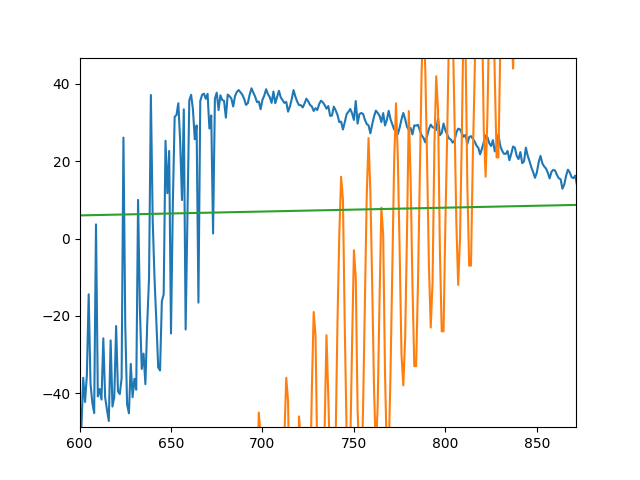

In [28]:
plt.plot(centre_list)
plt.plot(np.array(pos_list)-6000)
plt.plot(np.array(time_list)-time_list[0])

In [16]:
centre_list

array([], dtype=float64)

In [73]:
servo.close()

In [13]:
servo.moveByVelocity(0,-1)

In [19]:
servo.moveByVelocity(1,-2)

In [20]:
servo.moveByVelocity(1,0)

In [15]:
servo.getPosition(0), servo.getPosition(1)

(6000, 7500)

In [12]:
teacher = Syclop_Teacher()

In [13]:
device = DVS128()


device.start_data_stream()
# load new config
# device.set_bias_from_json("./scripts/configs/dvs128_config.json")
# print (device.get_bias())

clip_value = 3
histrange = [(0, v) for v in (128, 128)]
t_prev = time.time()



dt_nom = 0.025
# dt_list = []
cnt = 0
gohome()
while True:
    t_this = time.time()
    try:
        (pol_events, num_pol_event,
         special_events, num_special_event) = \
            device.get_event("events_hist")
        if t_this - t_prev > dt_nom:
                if num_pol_event != 0:
                    img = pol_events[..., 1]-pol_events[..., 0]
#                     I = np.sum(img,axis=0)**2
#                     I = I/(np.sum(I)+1e-10)
#                     centre = np.sum(I*np.array(range(len(I))))- len(I)/2.0 
                    
                    teacher.step(np.sum(img,axis=0))
                    servo.moveByVelocity(0,(int(np.round(teacher.vel))))
                    img = np.clip(img, -clip_value, clip_value)
                    img = img+clip_value

                    cv2.imshow("image", img/float(clip_value*2))
        #             print ("Number of events:", num_pol_event, "Number of special events:",
        #                    num_special_event,' delta t:', t_this-t_prev,'centre:',centre )
                    print ('{0}'.format(centre),  t_this-t_prev,servo.getPosition(0),servo.getPosition(1),'\r', end='')
                    t_prev=t_this
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
                    cnt +=1


#                     if cnt % 50 == 0:
#                         servo.moveByVelocity(0,2)
#                     elif cnt % 50 == 25:
#                         servo.moveByVelocity(0,-2)


    except KeyboardInterrupt:
            device.shutdown()
            break


In [24]:
int(np.round(-2.9))

-3